In [1]:
import pandas as pd
comments=pd.read_excel('evaluations_overall_comments.xlsx')

In [2]:
comments

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ..."
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...
...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an..."
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ..."
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...


In [3]:
#install vaderSentimentlibrary
# !pip install vaderSentiment

#import the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
  
    # return negative, neutral, positive, compound, overall_sentiment
    return compound


comments['Vader1 Score']=comments.apply(lambda x: sentiment_vader(x['Answer:']),axis=1)
comments['Vader1 Score']

0      0.8954
1      0.2732
2     -0.2960
3      0.8807
4      0.6290
        ...  
163    0.3818
164    0.7425
165    0.5423
166    0.7184
167    0.5719
Name: Vader1 Score, Length: 168, dtype: float64

In [8]:
comments[['Vader1 Score','Answer:']].loc[comments['Target:'] == 'Andre Tan']


,Vader1 Score,Answer:
115,0.6801,Andre could improve by showing more motivation...
116,0.5267,Whilst Andre puts in effort to review patients...
117,0.6353,He needs to be more proactive in learning . He...
118,0.6124,"Works well with team. Reliable, safe"
119,0.4588,Andre showed some improvement in his IBD knowl...
120,0.1027,I think overall whilst Andre is not a malignan...
121,0.4588,He is making some improvement with feedback in...
122,0.7506,We had discussed previously about Andre's 5 pe...
123,0.8442,Hope he will continue to improve in his clinic...
124,0.0000,Andre would need to show more dedication to le...


In [9]:
comments[['Answer:']].loc[comments['Vader1 Score'] == 0.0000]


,Answer:
10,"Overall, her performance is within the level o..."
20,able to act independently in most of the clini...
21,Gabrielle is a hardworking SR who puts in extr...
28,"hardworking, reliable, teamplayer"
50,Able to work almost independently.n
65,Dr. Li is a hardworking SR that has the requir...
81,Sam has all the qualities and skills expected ...
83,Sam is very steady and a reliable SR
84,Progressing as expected
101,Meets expectation. Continue to work on medical...


In [10]:

# install textblob
# !pip install textblob

# import it
from textblob import TextBlob

#call the classifier
def sentiment_texblob(row):
  
    classifier = TextBlob(row)
    polarity = classifier.sentiment.polarity
    subjectivity = classifier.sentiment.subjectivity
    
    return polarity

comments['Textblob Score']=comments.apply(lambda x: sentiment_texblob(x['Answer:']),axis=1)
comments['Textblob Score']

0      0.171429
1      0.136364
2      0.000000
3      0.263750
4      0.330000
         ...   
163    0.440625
164    0.375000
165    0.475000
166    0.000000
167    0.233333
Name: Textblob Score, Length: 168, dtype: float64

In [11]:
comments[['Answer:']].loc[comments['Textblob Score'] == 0.000000]


,Answer:
2,No concern
5,Please see comments above
6,"Conscientious, thorough, works in a team, keen..."
10,"Overall, her performance is within the level o..."
12,Meets expectation. Has improved in terms of cl...
14,She has improved a lot. Trustworthy.
18,No concern
21,Gabrielle is a hardworking SR who puts in extr...
24,Meets expectation. Dependable and guides junio...
25,Progressing well


In [12]:
# !pip install happytransformer
# from happytransformer import HappyTextClassification
# happy_tc=HappyTextClassification(model_type='DISTILBERT',model_name='distilbert-base-uncased-finetuned-sst-2-english',num_labels=2)
# comments['Transformer Score']=comments.apply(lambda x: happy_tc.classify_text(x['Answer:']),axis=1)


In [2]:
!pip install sentence_transformers

     ---------------------------------------- 0.0/86.0 kB ? eta -:--:--
     -------------------------------------- - 81.9/86.0 kB ? eta -:--:--
     ---------------------------------------- 86.0/86.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     -------------------- ------------------- 0.6/1.2 MB 12.9 MB/s eta 0:00:01
     ---------------------------------------- 1.2/1.2 MB 15.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/172.3 MB ? eta -:--:--
     --------------------------------------- 0.8/172.3 MB 16.1 MB/s eta 0:00:11
     --------------------------------------- 2.0/172.3 MB 20.8 MB/s eta 0:00:09
      -------------------------------------- 3.0/172.3 MB 21.5 MB/s eta 0:00:08
      -------------------------------------- 4.1/172.3 MB 22.0 MB/s eta 0:00:08
     - ------------------------------------- 5.2/17

  DEPRECATION: sentence_transformers is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


In [71]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Remove non-alphabetic characters
    alphabetic_tokens = [token for token in filtered_tokens if token.isalpha()]
    
    # Remove punctuation
    no_punct_tokens = [token for token in alphabetic_tokens if token not in string.punctuation]
    
    # Convert tokens to lowercase
    lowercase_tokens = [token.lower() for token in no_punct_tokens]
    
    lemmatized_words = [lemmatizer.lemmatize(word) for word in lowercase_tokens]
    
    # Join the tokens back into a string
    preprocessed_text = ' '.join(lemmatized_words)
    print(preprocessed_text)
    return preprocessed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\feryo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\feryo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\feryo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [79]:
import pandas as pd
from sentence_transformers import SentenceTransformer

# Load the pre-trained model
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Define a function to extract the keywords from a given text using the model
def extract_keywords(text):
    # Encode the text using the pre-trained model
    embeddings = model.encode(text)
    # Calculate the cosine similarity between the embeddings
    cosine_similarities = pd.DataFrame(embeddings).T.corr().values
    # Get the indices of the top 5 most similar embeddings
    top_indices = cosine_similarities.argsort()[::-1][:5]
    print(top_indices)
    # Get the corresponding keywords from the original text
    keywords = [text[i] for i in top_indices]
    return keywords

# Load the DataFrame
df = pd.read_excel('evaluations_overall_comments.xlsx')
df=df.reset_index()

# Extract the keywords from the 'comment' column using the function
df['keywords'] = df['Answer:'].apply(extract_keywords)

TypeError: only integer scalar arrays can be converted to a scalar index

In [73]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

n_gram_range = (1, 1)
stop_words = "english"
comments=pd.read_excel('evaluations_overall_comments.xlsx')
sentences=comments['Answer:'].values.tolist()
# Extract candidate words/phrases
count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit(sentences)
candidates = count.get_feature_names_out()

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
# doc_embedding = model.encode([doc])
candidate_embeddings = model.encode(candidates)
# doc_embedding
comments['Answer'] = comments['Answer:'].apply(preprocess_text)


comments['Doc_Embed']=comments.apply(lambda x: model.encode([x['Answer']]),axis=1)
comments['Distance']=comments.apply(lambda x:cosine_similarity(x['Doc_Embed'],candidate_embeddings),axis=1)
top_n = 5

comments['Keywords']=comments['Distance'].apply(lambda x: [candidates[index] for index in x.argsort()[0][-top_n:]])

comments['Keywords']

eliza chen starting therefore expected scoring lower competency right attitude learn improve continue systematic approach deliberate practice level lead confidence leader team well
new senior resident gastroenterology eliza chen well know patient could interpret clinical data formulates management plan
concern
overall would rate eliza chen highly term medical knowledge meet expectation term pbli improved would like see habit higher order thinking critical enquiry looking literature rather follow guideline known term patient care professionalism communication excellent ca really ask term sbp meet expectation
eliza chen quiet disposition give good thought management however bit quiet project impression good control subordinate knowledge gap discus case aware insight
please see comment
conscientious thorough work team keen learn
performing well first year seen giving good feedback junior night call prepares well presentation
strength conscientious responsible follow task timeliness manner

0      [diligent, caring, teaching, holistic, teachable]
1      [geriatric, healthcare, inpatient, inpatients,...
2           [situation, issue, issues, problem, concern]
3      [medical, inpatients, inpatient, healthcare, m...
4             [slow, quiet, calm, polite, introspective]
                             ...                        
163    [diagnosis, doctors, doctor, colonoscopes, col...
164    [hardworking, efficient, professionalism, trus...
165        [maturity, early, beginner, matures, matured]
166    [physician, doctors, nurses, inpatient, inpati...
167    [inpatient, clinics, physician, medical, medic...
Name: Keywords, Length: 168, dtype: object

In [76]:
keyword=comments.to_excel('keyword_test.xlsx')

TEXT RANK KEYWORD EXTRACTOR - HORRIBLE

In [31]:
import pandas as pd
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
from itertools import tee
from nltk.tokenize import sent_tokenize
import networkx as nx
import matplotlib.pyplot as plt


# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
# Define a function to extract keywords using TextRank
def extract_keywords_textrank(text):
    # Split text into sentences
    sentences = sent_tokenize(text)
    # Create a graph
    graph = nx.Graph()
    # Add nodes to the graph
    for sentence in sentences:
        words = sentence.split()
        for word in words:
            graph.add_node(word)
    # Add edges to the graph
    for sentence in sentences:
        words = sentence.split()
        word_pairs = tee(words, 2)
        next(word_pairs[1], None)
        for pair in zip(word_pairs[0], word_pairs[1]):
            if graph.has_edge(pair[0], pair[1]):
                graph[pair[0]][pair[1]]["weight"] += 1
            else:
                graph.add_edge(pair[0], pair[1], weight=1)
    # Calculate the TextRank scores for each node
    scores = nx.pagerank(graph)
    # Sort the nodes by their scores
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    # Extract the top 10 keywords
    keywords = [score[0] for score in sorted_scores[:10]]
    return keywords

# Apply the extract_keywords_textrank function to the preprocessed_text column
comments["keywords_textrank"] = comments["Answer:"].apply(extract_keywords_textrank)

# Print the results
print(comments["keywords_textrank"])

0      [chen, team, starting, leader, therefore, conf...
1      [senior, management, resident, formulates, gas...
2                                              [concern]
3      [terms, would, meets, expectations, critical, ...
4      [quiet, good, aware, cases, discuss, gaps, che...
                             ...                        
163    [bleeder, major, call, competent, good, colono...
164    [extremely, pleasure, professional, competent,...
165    [making, first, good, compared, progress, issu...
166    [ward, also, junior, doctors, clinically, comp...
167    [summarise, medicine, key, based, issues, evid...
Name: keywords_textrank, Length: 168, dtype: object


In [34]:
import pandas as pd
from rake_nltk import Rake
# initialize RAKE
r = Rake()

# function to extract keywords using RAKE
def rake_extract_keywords(text):
    r.extract_keywords_from_text(text)
    return r.get_ranked_phrases()

# apply function to dataframe column
comments['keywords'] = comments['Answer:'].apply(rake_extract_keywords)
comments['keywords']

0      [eliza chen starting therefore expected scorin...
1      [new senior resident gastroenterology eliza ch...
2                                              [concern]
3      [overall would rate eliza chen highly terms me...
4      [eliza chen quiet disposition gives good thoug...
                             ...                        
163    [week bleeder call good mgmt plans decision ma...
164     [competent extremely professional pleasure work]
165     [issue making good progress compared first year]
166    [rachel clinically competent trust manage pati...
167    [able summarise key issues suggest reasonable ...
Name: keywords, Length: 168, dtype: object

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\feryo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


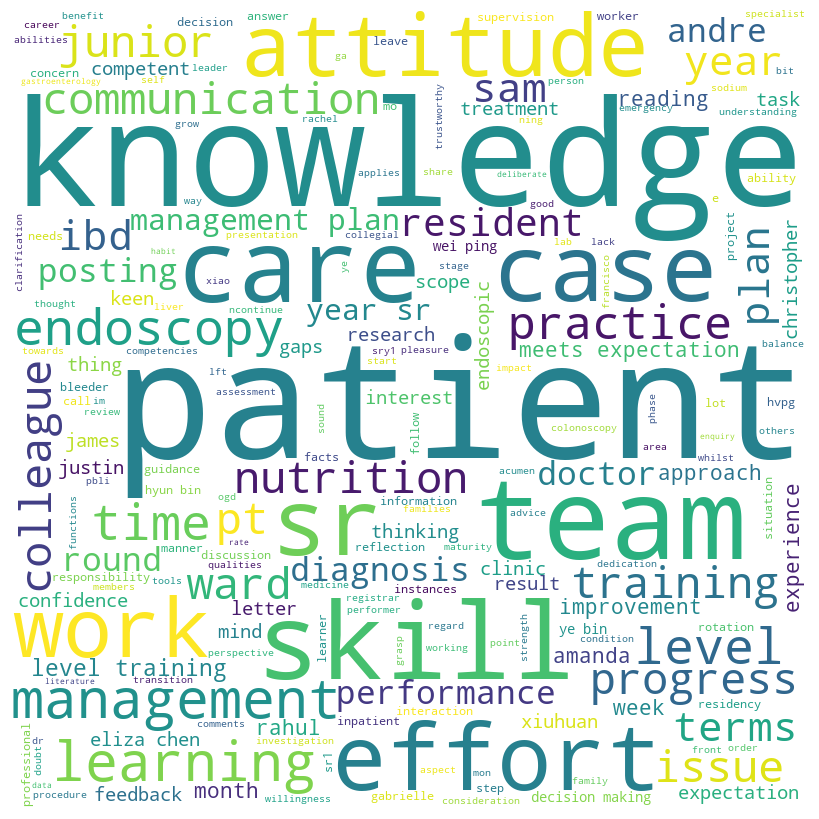

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')


# Define the POS tagger
tagger = nltk.pos_tag

# Define a set of stop words to remove
stop_words = set(stopwords.words('english'))

# Define a list to store the nouns
nouns = []

# Loop over the comments and extract the nouns
for comment in df['Answer:']:
    tokens = word_tokenize(comment)
    tagged_tokens = tagger(tokens)
    for word, tag in tagged_tokens:
        if tag.startswith('NN') and word.lower() not in stop_words:
            nouns.append(word.lower())

# Join the nouns into a single string
all_nouns = ' '.join(nouns)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS).generate(all_nouns)

# Plot the WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
  
# Display the plot
plt.show()


In [ ]:
comments['Keywords']

0      [outpatient, professionalism, holistic, teacha...
1      [pharmacists, medicine, inpatients, inpatient,...
2         [quiet, independently, minimal, passive, lack]
3       [medical, doctors, healthcare, nurses, medicine]
4        [caring, calm, diligent, polite, introspective]
                             ...                        
163    [outpatient, medicine, colonoscopes, 2022, col...
164    [professionalism, treasured, reliable, efficie...
165      [maturity, completed, matures, mature, matured]
166    [doctors, medicine, inpatient, inpatients, nur...
167    [inpatients, medical, inpatient, healthcare, m...
Name: Keywords, Length: 168, dtype: object

In [57]:
import pandas as pd
from transformers import pipeline, AutoTokenizer

# Load the RoBERTa-base Squad2 model and tokenizer
model_name = "deepset/roberta-base-squad2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
qa_pipeline = pipeline("question-answering", model=model_name, tokenizer=tokenizer)

# Load the DataFrame with the text comments
df = pd.read_excel("evaluations_overall_comments.xlsx")

# Define the question to ask
question = "What?"

# Extract multiple answers for each comment in the DataFrame
df["answers"] = df["Answer:"].apply(lambda x: [ans["answer"] for ans in qa_pipeline(question=question, context=x, top_k=2)])

# Print the DataFrame with the extracted answers
print(df[['Answer:','answers']])


                                               Answer:  \
0    Eliza Chen is starting out and therefore as ex...   
1    As a new senior resident to gastroenterology, ...   
2                                           No concern   
3    Overall I would rate Eliza Chen highly as a SR...   
4    Eliza Chen has a quiet disposition and gives g...   
..                                                 ...   
163  did a week of bleeder call, good mgmt plans an...   
164  very competent, extremely professional, and a ...   
165  No issue. Making good progress compared to fir...   
166  Rachel is clinically competent and I can trust...   
167  Able to summarise key issues and suggest a rea...   

                                               answers  
0    [starting out and therefore as expected, will ...  
1               [gastroenterology, knows the patients]  
2                                [No concern, concern]  
3    [medical knowledge, In terms of medical knowle...  
4    [knowledge ga

In [58]:
# Load the BERT-large-uncased-whole-word-masking-finetuned-squad model and tokenizer
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"
tokenizer = AutoTokenizer.from_pretrained(model_name)
qa_pipeline = pipeline("question-answering", model=model_name, tokenizer=tokenizer)

# Extract answers for each comment in the DataFrame
df["answer2"] = df["Answer:"].apply(lambda x: qa_pipeline(question=question, context=x)["answer"])

# Print the DataFrame with the extracted answers
print(df)

         Target:                      Evaluator:       Rotation Dates:  \
0     Eliza Chen      Dr. Ong, Andrew Ming Liang    7/1/2022-7/31/2022   
1     Eliza Chen         Dr. Chan, Webber Pak Wo    7/1/2022-7/31/2022   
2     Eliza Chen              Dr. Lim, Chee Hooi    7/1/2022-7/31/2022   
3     Eliza Chen         Dr. Chang, Jason Pik Eu    8/1/2022-8/31/2022   
4     Eliza Chen              Dr. Tan, Chee Kiat    8/1/2022-8/31/2022   
..           ...                             ...                   ...   
163  Rachel Yeap     Dr. Tan, Malcolm Teck Kiang    7/1/2022-7/31/2022   
164  Rachel Yeap  Dr. Khor, Christopher Jen Lock    8/1/2022-8/31/2022   
165  Rachel Yeap               Dr. Liou, Wei Lun    8/1/2022-8/31/2022   
166  Rachel Yeap             Dr. Loo, Khang Ning    9/1/2022-10/2/2022   
167  Rachel Yeap        Dr. Kwek, Andrew Boon Eu  10/3/2022-10/31/2022   

                         Service:  \
0                             - -   
1       SHS-GASTRO:BASIC ENDO-SGH   


In [60]:
qa=df.to_excel('qa_test.xlsx')

In [ ]:
comments[['Keywords']].loc[comments['Vader1 Score'] <= 0.000000]


,Keywords
2,"[quiet, independently, minimal, passive, lack]"
10,"[practice, competencies, requisite, discipline..."
16,"[matured, healthcare, inpatients, clinics, pro..."
18,"[quiet, independently, minimal, passive, lack]"
19,"[lacking, outpatient, short, limited, weakness]"
20,"[diligently, professionalism, clinical, mature..."
21,"[competing, competency, competencies, training..."
28,"[professionalism, proactive, reliable, hardwor..."
50,"[settled, independent, independently, efficien..."
63,"[overthinks, doubts, limited, receptive, unsure]"


In [ ]:
comments[['Keywords']].loc[comments['Textblob Score'] <= 0.000000]


,Keywords
2,"[quiet, independently, minimal, passive, lack]"
5,"[posting, presentation, discusses, presentatio..."
6,"[professionalism, trustworthy, training, teach..."
10,"[practice, competencies, requisite, discipline..."
11,"[competing, training, competencies, hardworkin..."
12,"[teachable, treatments, diagnostic, improvemen..."
14,"[improving, improves, efficient, receptive, im..."
18,"[quiet, independently, minimal, passive, lack]"
19,"[lacking, outpatient, short, limited, weakness]"
21,"[competing, competency, competencies, training..."


In [ ]:
# WORDCLOUD
from itertools import chain
out = (comments.groupby('Target:', as_index=False)['Keywords']
         .agg(lambda x: list(chain.from_iterable(x)))
       )


In [ ]:
out

,Target:,Keywords
0,Amanda Koh,"[new, juniors, competing, outpatient, beginner..."
1,Andre Tan,"[improving, teaching, educating, colleagues, t..."
2,Christopher Tan,"[sr3, majority, 3rd, juniors, beginner, inpati..."
3,Eliza Chen,"[outpatient, professionalism, holistic, teacha..."
4,Francisco Tan,"[physician, healthcare, doctors, professionali..."
5,Gabrielle Ho,"[practice, competencies, requisite, discipline..."
6,James Wang,"[physician, medicine, doctors, inpatients, inp..."
7,Jiang Xiao Ye,"[respected, reliable, caring, trustworthy, pol..."
8,Justin Bieber,"[hardworking, teachable, reliable, professiona..."
9,Kang Hyun Bin,"[reliable, proactive, trustworthy, efficient, ..."


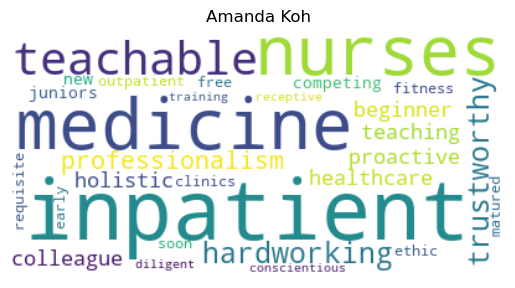

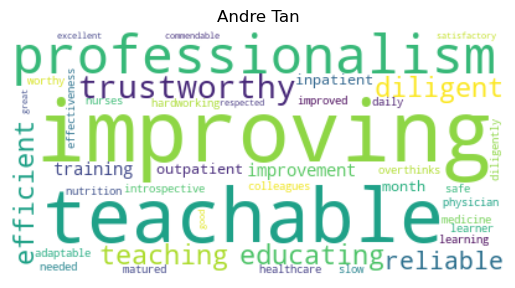

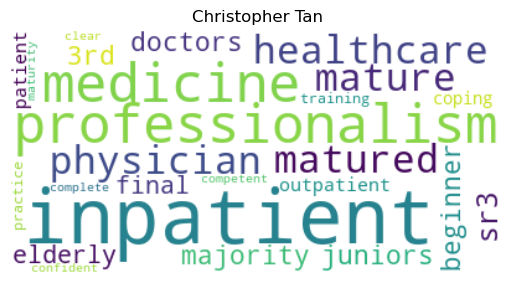

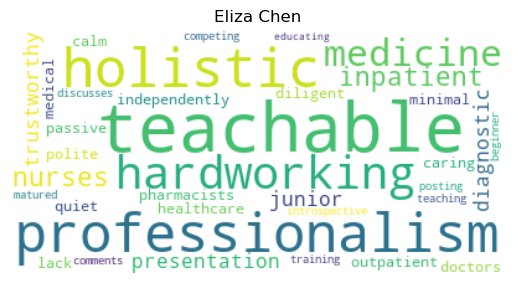

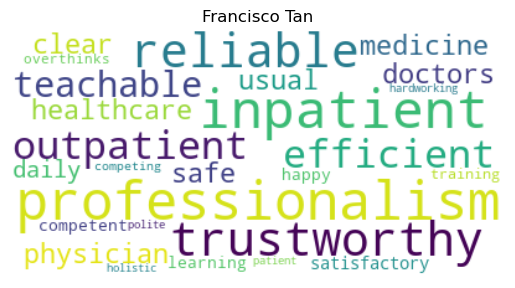

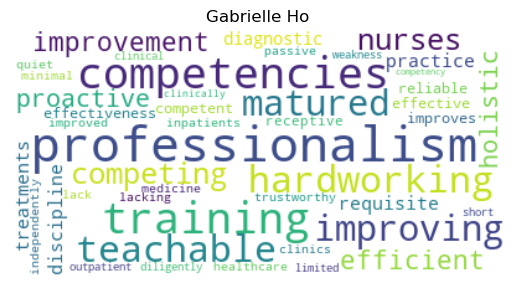

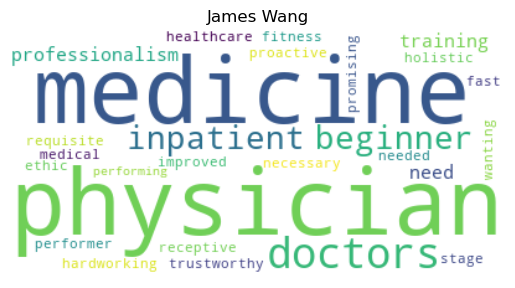

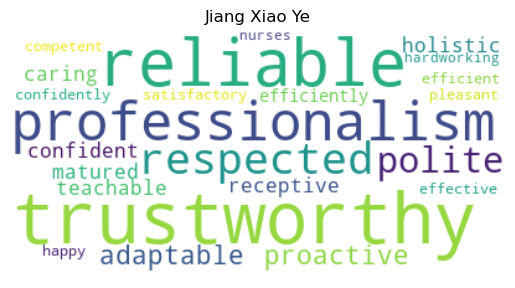

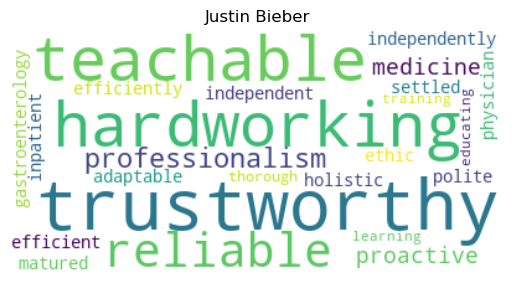

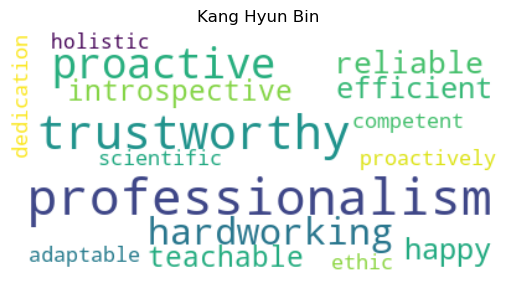

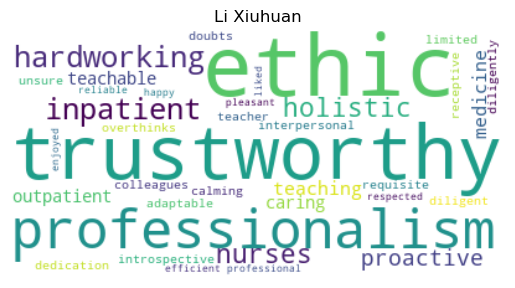

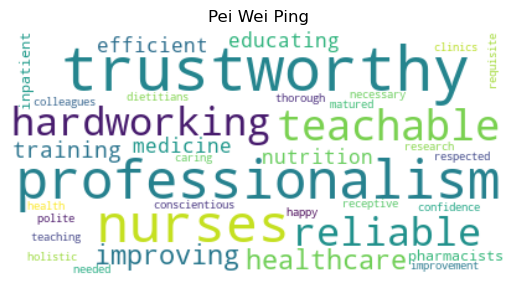

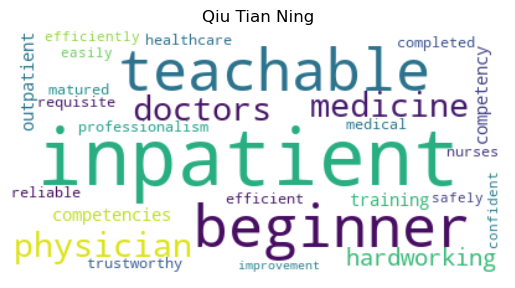

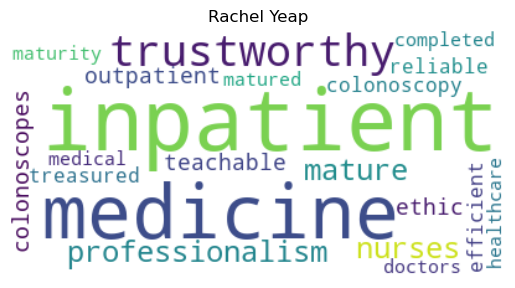

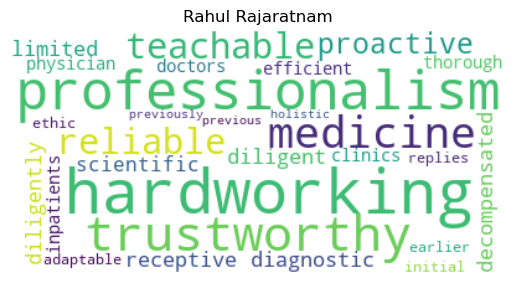

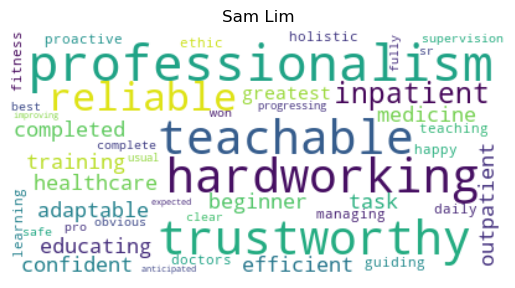

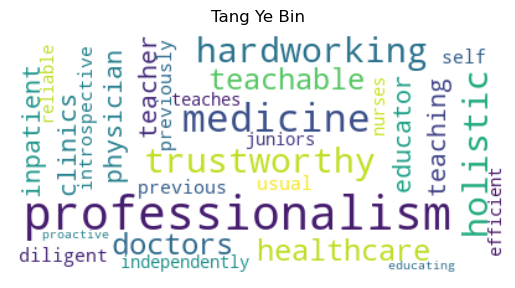

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for each row with title
for index, row in out.iterrows():
    text = ' '.join(row['Keywords'])
    wordcloud = WordCloud(background_color='white').generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(row['Target:'])
    plt.show()

In [ ]:
# BAR CHART BASED ON EVALUATOR

out2 =comments.groupby('Evaluator:')['Vader1 Score'].mean()



In [ ]:
counts = comments['Evaluator:'].value_counts()

In [ ]:
out2 = out2.to_frame().reset_index()
out2

,Evaluator:,Vader1 Score
0,"Dr. Abdul Halim, Nurul Aidah",0.624900
1,"Dr. Ang, Tiing Leong",0.394500
2,"Dr. Asokkumar, Ravishankar",0.495386
3,"Dr. Balasubramanian, Diraviyam",0.844200
4,"Dr. Chan, Webber Pak Wo",0.453267
5,"Dr. Chang, Jason Pik Eu",0.781550
6,"Dr. Cheah, Kee Leong",0.454850
7,"Dr. Cheah, Mark Chang Chuen",0.650371
8,"Dr. De Roza, Marianne",0.416767
9,"Dr. Gan, Sheryl Shien Wen",0.948500


In [ ]:
counts= counts.to_frame().reset_index()

counts.columns = ['Evaluator:', 'Vader1 Score']
counts

,Evaluator:,Vader1 Score
0,"Dr. Salazar, Ennaliza",8
1,"Dr. Li, James Weiquan",8
2,"Dr. Kwek, Andrew Boon Eu",8
3,"Dr. Cheah, Mark Chang Chuen",7
4,"Dr. Asokkumar, Ravishankar",7
5,"Dr. Ong, Jeannie Peng Lan",7
6,"Dr. Chan, Webber Pak Wo",6
7,"Dr. Liou, Wei Lun",6
8,"Dr. Kumar, Rahul",6
9,"Dr. Khor, Christopher Jen Lock",6


In [ ]:
test2 = pd.merge(out2,counts, on = ['Evaluator:'], how='left')
test3=test2[test2['Vader1 Score_y']>4]
test3

,Evaluator:,Vader1 Score_x,Vader1 Score_y
2,"Dr. Asokkumar, Ravishankar",0.495386,7
4,"Dr. Chan, Webber Pak Wo",0.453267,6
7,"Dr. Cheah, Mark Chang Chuen",0.650371,7
11,"Dr. Khor, Christopher Jen Lock",0.658550,6
12,"Dr. Krishnamoorthy, Thinesh Lee",0.774500,5
13,"Dr. Kumar, Rahul",0.679367,6
16,"Dr. Kwek, Andrew Boon Eu",0.505038,8
18,"Dr. Li, James Weiquan",0.672087,8
23,"Dr. Lim, Thomson Chong Teik",0.139260,5
26,"Dr. Liou, Wei Lun",0.606483,6


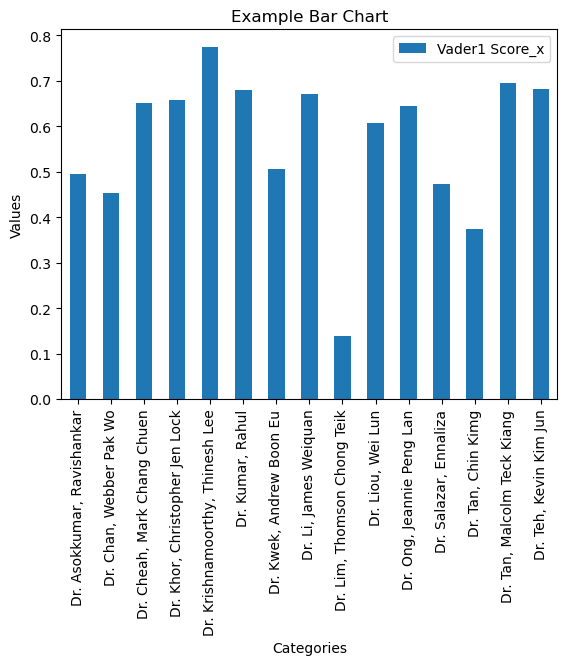

In [ ]:
test3.plot(x='Evaluator:', y='Vader1 Score_x', kind='bar')

# Set the title and axis labels
plt.title('Example Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show the plot
plt.show()

In [ ]:
comments[['Answer:','Vader1 Score']].loc[comments['Evaluator:']=='Dr. Lim, Thomson Chong Teik']
#fucking need finetuning bro

,Answer:,Vader1 Score
21,Gabrielle is a hardworking SR who puts in extr...,0.0000
42,Resident is SR1 and is quickly learning to man...,0.0258
54,Justin is a hardworking Gastro SR that is also...,0.6705
65,Dr. Li is a hardworking SR that has the requir...,0.0000
81,Sam has all the qualities and skills expected ...,0.0000


In [ ]:
# BAR CHART BASED ON SERVICE
out3 =comments.groupby('Service:')['Vader1 Score'].mean()
out3 = out3.to_frame().reset_index()
out3

,Service:,Vader1 Score
0,- -,0.722967
1,SHS-GASTRO:ADV ENDO-CGH,0.570992
2,SHS-GASTRO:BASIC ENDO-CGH,0.267750
3,SHS-GASTRO:BASIC ENDO-SGH,0.387554
4,SHS-GASTRO:GEN GASTROHEP(ELEC)-CGH,0.641262
5,SHS-GASTRO:GEN GASTROHEP(ELEC)-SGH,0.474425
6,SHS-GASTRO:GEN GASTROHEP(ELEC)-SKH,0.633067
7,SHS-GASTRO:GEN GASTROHEP-CGH,0.629730
8,SHS-GASTRO:GEN GASTROHEP-SGH,0.497309
9,SHS-GASTRO:IBD & NUTRI-SGH,0.613626


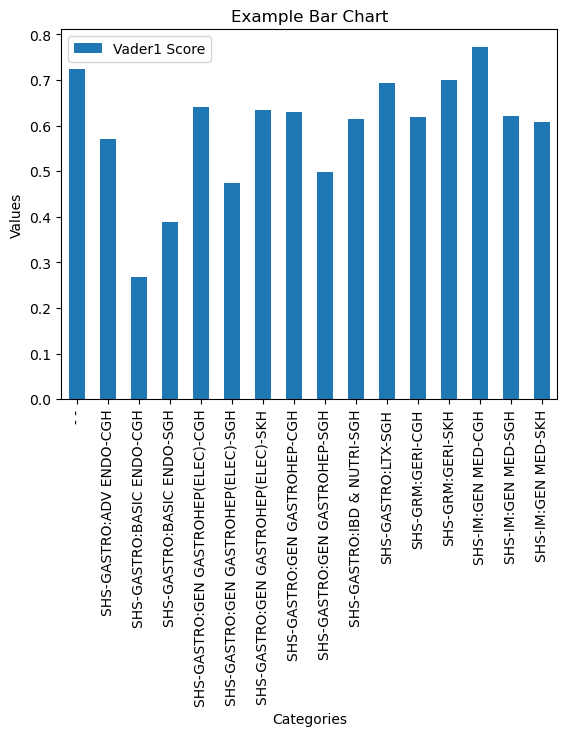

In [ ]:
out3.plot(x='Service:', y='Vader1 Score', kind='bar')

# Set the title and axis labels
plt.title('Example Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show the plot
plt.show()

In [ ]:
comments[['Answer:']].loc[comments['Service:']=='SHS-GASTRO:BASIC ENDO-CGH'].loc[102].values.tolist()
#bro need finetuning

['Tian Ning is very competent as an SR1. She is able to identify gaps in her learning and to seek clarification when needed.']

In [ ]:
# SCATTER PLOT BETWEEN COMMENT SCORE AND ANSWER SCORE
exam_score=pd.read_excel('evaluations_overall_score.xlsx')
exam_score['Answer']=exam_score['Answer:'].apply(lambda x:int(x[0]) )
exam_score= exam_score.drop('Answer:', axis=1)


In [ ]:
comments

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:,Vader1 Score,Textblob Score,Doc_Embed,Distance,Keywords
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...,0.8954,0.171429,"[[-0.6721534, -0.027664, 0.70268226, -0.476056...","[[-0.09625689, 0.11881207, 1.9541476e-05, 0.09...","[outpatient, professionalism, holistic, teacha..."
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ...",0.2732,0.136364,"[[-0.42423996, -0.6286227, 0.88219756, -0.6787...","[[-0.0859189, 0.17790526, -0.016277257, 0.0281...","[pharmacists, medicine, inpatients, inpatient,..."
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern,-0.2960,0.000000,"[[-0.6876688, 0.02974713, 0.109754026, 0.12074...","[[0.6711223, 0.41983747, 0.5360163, 0.5921104,...","[quiet, independently, minimal, passive, lack]"
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...,0.8807,0.263750,"[[-0.6283155, -0.20029192, 1.1669189, -0.10387...","[[0.028535588, 0.28990865, 0.0832851, 0.186433...","[medical, doctors, healthcare, nurses, medicine]"
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...,0.6290,0.330000,"[[-0.8619444, -0.18374743, 0.21259235, 0.16743...","[[-0.0062184343, 0.13000053, 0.01491292, 0.150...","[caring, calm, diligent, polite, introspective]"
...,...,...,...,...,...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an...",0.3818,0.440625,"[[0.1212126, -0.52477044, 1.1620986, -0.917062...","[[-0.061233785, 0.28290597, 0.0270812, -0.0234...","[outpatient, medicine, colonoscopes, 2022, col..."
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ...",0.7425,0.375000,"[[-0.2288021, -0.4193769, 0.4208119, 0.1031569...","[[0.2495091, 0.22908753, 0.33462763, 0.5758852...","[professionalism, treasured, reliable, efficie..."
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...,0.5423,0.475000,"[[-0.34792647, -1.0121427, 0.16201107, -1.0558...","[[0.42752415, 0.48969555, 0.44772327, 0.458115...","[maturity, completed, matures, mature, matured]"
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...,0.7184,0.000000,"[[-0.5686393, -0.43344223, 0.682797, 0.342227,...","[[-0.14905263, 0.09871096, -0.12953652, 0.0126...","[doctors, medicine, inpatient, inpatients, nur..."


In [ ]:
score_comments=pd.merge(comments,exam_score, on = ['Target:','Evaluator:','Rotation Dates:','Service:'], how='left')


<AxesSubplot:xlabel='Answer', ylabel='Density'>

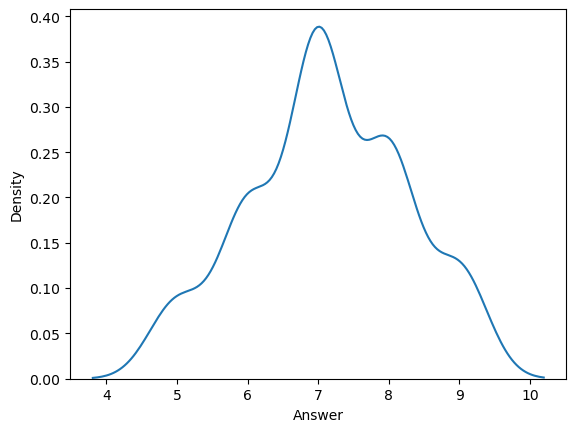

In [ ]:
import seaborn as sns
sns.kdeplot(score_comments['Answer'])

<AxesSubplot:xlabel='Vader1 Score', ylabel='Density'>

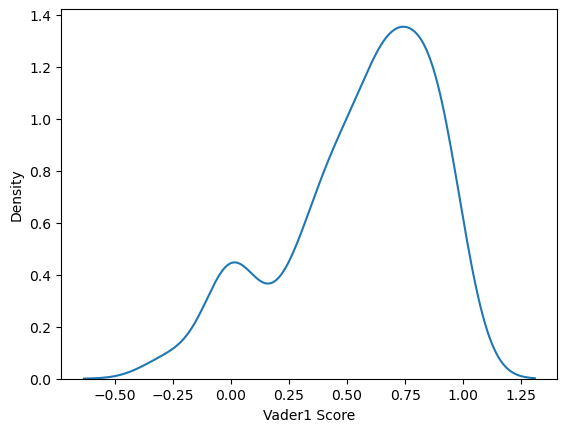

In [ ]:
sns.kdeplot(score_comments['Vader1 Score'])

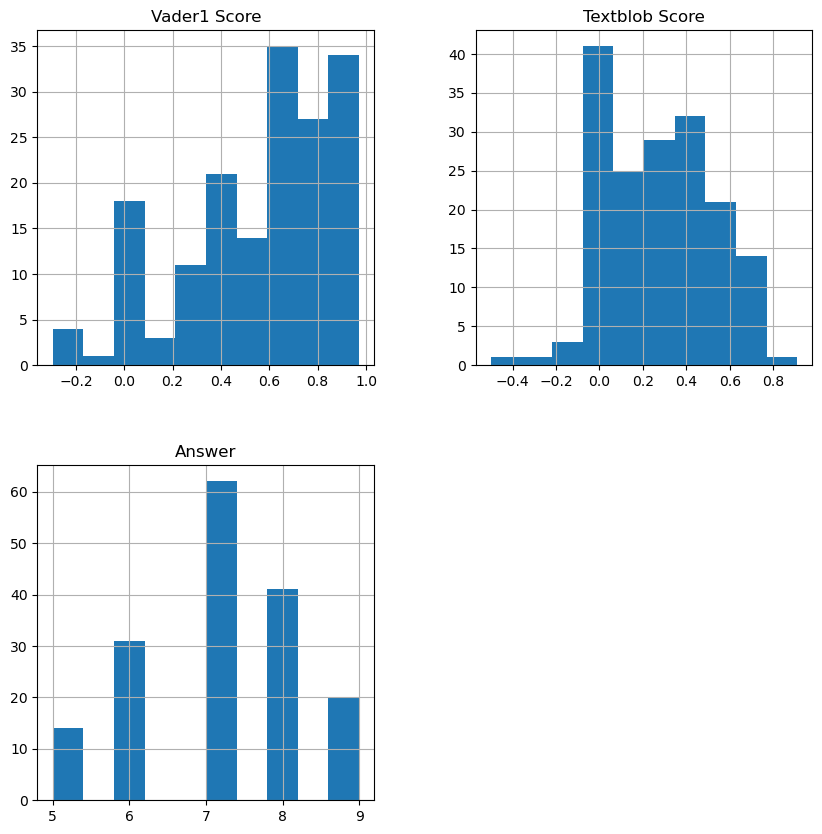

In [ ]:
score_comments.hist(figsize=[10,10])
plt.show()

In [ ]:
score_comments

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:,Vader1 Score,Textblob Score,Doc_Embed,Distance,Keywords,Answer
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...,0.8954,0.171429,"[[-0.6721534, -0.027664, 0.70268226, -0.476056...","[[-0.09625689, 0.11881207, 1.9541476e-05, 0.09...","[outpatient, professionalism, holistic, teacha...",5
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ...",0.2732,0.136364,"[[-0.42423996, -0.6286227, 0.88219756, -0.6787...","[[-0.0859189, 0.17790526, -0.016277257, 0.0281...","[pharmacists, medicine, inpatients, inpatient,...",7
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern,-0.2960,0.000000,"[[-0.6876688, 0.02974713, 0.109754026, 0.12074...","[[0.6711223, 0.41983747, 0.5360163, 0.5921104,...","[quiet, independently, minimal, passive, lack]",5
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...,0.8807,0.263750,"[[-0.6283155, -0.20029192, 1.1669189, -0.10387...","[[0.028535588, 0.28990865, 0.0832851, 0.186433...","[medical, doctors, healthcare, nurses, medicine]",7
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...,0.6290,0.330000,"[[-0.8619444, -0.18374743, 0.21259235, 0.16743...","[[-0.0062184343, 0.13000053, 0.01491292, 0.150...","[caring, calm, diligent, polite, introspective]",5
...,...,...,...,...,...,...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an...",0.3818,0.440625,"[[0.1212126, -0.52477044, 1.1620986, -0.917062...","[[-0.061233785, 0.28290597, 0.0270812, -0.0234...","[outpatient, medicine, colonoscopes, 2022, col...",8
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ...",0.7425,0.375000,"[[-0.2288021, -0.4193769, 0.4208119, 0.1031569...","[[0.2495091, 0.22908753, 0.33462763, 0.5758852...","[professionalism, treasured, reliable, efficie...",7
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...,0.5423,0.475000,"[[-0.34792647, -1.0121427, 0.16201107, -1.0558...","[[0.42752415, 0.48969555, 0.44772327, 0.458115...","[maturity, completed, matures, mature, matured]",8
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...,0.7184,0.000000,"[[-0.5686393, -0.43344223, 0.682797, 0.342227,...","[[-0.14905263, 0.09871096, -0.12953652, 0.0126...","[doctors, medicine, inpatient, inpatients, nur...",7


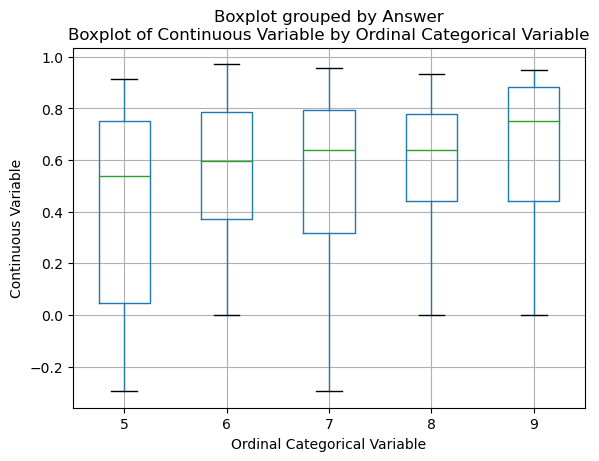

In [ ]:
# Create a boxplot
score_comments.boxplot(column='Vader1 Score', by='Answer')

# Set the axis labels and title
plt.xlabel('Ordinal Categorical Variable')
plt.ylabel('Continuous Variable')
plt.title('Boxplot of Continuous Variable by Ordinal Categorical Variable')

# Show the plot
plt.show()

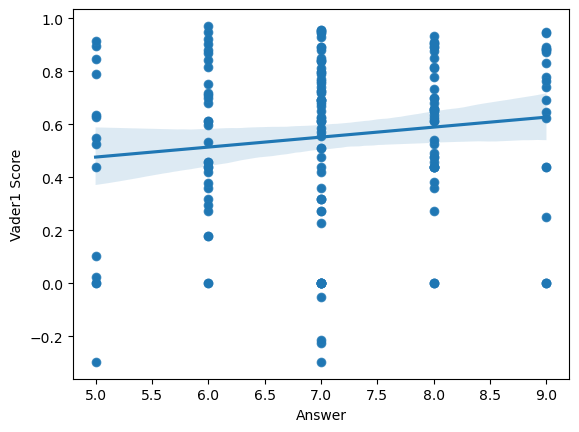

In [ ]:

# Create a scatter plot using seaborn
sns.scatterplot(y='Vader1 Score', x='Answer', data=score_comments)

# Add a best fit line to the scatter plot
sns.regplot(y='Vader1 Score', x='Answer', data=score_comments)

# Display the plot
plt.show()

In [ ]:
import pandas as pd
comments=pd.read_excel('evaluations_overall_comments.xlsx')
comments

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ..."
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...
...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an..."
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ..."
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...


In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
 
 
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

comments['processed']=comments['Answer:'].apply(lambda x: preprocess(x))
comments['encoded']=comments['processed'].apply(lambda x:tokenizer(x,return_tensors='pt'))
comments['output']=comments['encoded'].apply(lambda x:model(**x))
comments['scores']=comments['output'].apply(lambda x:softmax(x[0][0].detach().numpy()))
print(comments)



Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at C:\Users\WongQiHuiYve/.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment\snapshots\daefdd1f6ae931839bce4d0f3db0a1a4265cd50f\config.json
Model config RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attentio

         Target:                      Evaluator:       Rotation Dates:  \
0     Eliza Chen      Dr. Ong, Andrew Ming Liang    7/1/2022-7/31/2022   
1     Eliza Chen         Dr. Chan, Webber Pak Wo    7/1/2022-7/31/2022   
2     Eliza Chen              Dr. Lim, Chee Hooi    7/1/2022-7/31/2022   
3     Eliza Chen         Dr. Chang, Jason Pik Eu    8/1/2022-8/31/2022   
4     Eliza Chen              Dr. Tan, Chee Kiat    8/1/2022-8/31/2022   
..           ...                             ...                   ...   
163  Rachel Yeap     Dr. Tan, Malcolm Teck Kiang    7/1/2022-7/31/2022   
164  Rachel Yeap  Dr. Khor, Christopher Jen Lock    8/1/2022-8/31/2022   
165  Rachel Yeap               Dr. Liou, Wei Lun    8/1/2022-8/31/2022   
166  Rachel Yeap             Dr. Loo, Khang Ning    9/1/2022-10/2/2022   
167  Rachel Yeap        Dr. Kwek, Andrew Boon Eu  10/3/2022-10/31/2022   

                         Service:  \
0                             - -   
1       SHS-GASTRO:BASIC ENDO-SGH   


In [ ]:
!pip install tensorflow==2.6.0 --user

  Using cached tensorflow-2.6.0-cp39-cp39-win_amd64.whl (423.3 MB)
  Using cached numpy-1.19.5-cp39-cp39-win_amd64.whl (13.3 MB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached h5py-3.1.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
tensorflow-intel 2.12.0 requires absl-py>=1.0.0, but you have absl-py 0.15.0 which is incompatible.
tensorflow-intel 2.12.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.19.5 which is incompatible.
pylint 2.14.5 requires typing-extensions>=3.10.0; python_version < "3.10", but you have typing-extensions 3.7.4.3 which is incompatible.
jax 0.4.6 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
cond

In [ ]:
import torch
from sklearn.metrics import accuracy_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from torch.nn.utils.rnn import pad_sequence

# # Load tokenizer and model
# model_name = "cardiffnlp/twitter-roberta-base-sentiment"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Load and preprocess data
dataset = load_dataset("imdb")
train_dataset = dataset["train"].map(lambda example: {"text": example["text"], "label": example["label"]})
val_dataset = dataset["test"].map(lambda example: {"text": example["text"], "label": example["label"]})

def preprocess_function(examples):
    return tokenizer(examples["text"], padding=True, truncation=True,max_length=300)

train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)

train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# Define training arguments and trainer
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    evaluation_strategy="no",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_strategy = 'no'
)

def compute_accuracy(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return accuracy_score(labels, preds)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_accuracy
)

# Train model
trainer.train()

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
from datasets import load_dataset
from torch.nn.utils.rnn import pad_sequence

raw_datasets = load_dataset("imdb")
from transformers import AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained(MODEL)
inputs = tokenizer(sentences, padding="max_length", truncation=True)
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000)) 
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000)) 
padded_train_dataset = pad_sequence(small_train_dataset, batch_first=True)
padded_eval_dataset = pad_sequence(small_eval_dataset, batch_first=True)

full_train_dataset = tokenized_datasets["train"]
full_eval_dataset = tokenized_datasets["test"]

# from transformers import AutoModelForSequenceClassification

# model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)
from transformers import TrainingArguments

training_args = TrainingArguments("test_trainer")
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args, train_dataset=small_train_dataset, eval_dataset=small_eval_dataset
)

trainer.train()

import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)
trainer.evaluate()


  0%|          | 0/3 [00:00<?, ?it/s]

TypeError: expected Tensor as element 0 in argument 0, but got dict

In [ ]:
from datasets import load_dataset

dataset = load_dataset("yelp_review_full")
dataset["train"][100]

from transformers import AutoTokenizer

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_datasets = dataset.map(tokenize_function, batched=True)

tokenized_datasets = tokenized_datasets.remove_columns(["text"])

tokenized_datasets = tokenized_datasets.rename_column("label", "labels")

tokenized_datasets.set_format("torch")

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))

from torch.utils.data import DataLoader

train_dataloader = DataLoader(small_train_dataset, shuffle=True, batch_size=8)
eval_dataloader = DataLoader(small_eval_dataset, batch_size=8)

from transformers import AutoModelForSequenceClassification


from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

from transformers import get_scheduler

num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset yelp_review_full downloaded and prepared to C:/Users/WongQiHuiYve/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/e8e18e19d7be9e75642fc66b198abadb116f73599ec89a69ba5dd8d1e57ba0bf. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/650000 [00:00<?, ? examples/s]

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

  0%|          | 0/375 [00:00<?, ?it/s]

RuntimeError: stack expects each tensor to be equal size, but got [129] at entry 0 and [135] at entry 1

In [ ]:
import evaluate

metric = evaluate.load("accuracy")
model.eval()
for batch in eval_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])

metric.compute()

In [ ]:
small_train_dataset 

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 1000
})

In [ ]:

comments['output2']=comments['encoded'].apply(lambda x:model(**x))
comments['scores2']=comments['output2'].apply(lambda x:softmax(x[0][0].detach().numpy()))
print(comments)

         Target:                      Evaluator:       Rotation Dates:  \
0     Eliza Chen      Dr. Ong, Andrew Ming Liang    7/1/2022-7/31/2022   
1     Eliza Chen         Dr. Chan, Webber Pak Wo    7/1/2022-7/31/2022   
2     Eliza Chen              Dr. Lim, Chee Hooi    7/1/2022-7/31/2022   
3     Eliza Chen         Dr. Chang, Jason Pik Eu    8/1/2022-8/31/2022   
4     Eliza Chen              Dr. Tan, Chee Kiat    8/1/2022-8/31/2022   
..           ...                             ...                   ...   
163  Rachel Yeap     Dr. Tan, Malcolm Teck Kiang    7/1/2022-7/31/2022   
164  Rachel Yeap  Dr. Khor, Christopher Jen Lock    8/1/2022-8/31/2022   
165  Rachel Yeap               Dr. Liou, Wei Lun    8/1/2022-8/31/2022   
166  Rachel Yeap             Dr. Loo, Khang Ning    9/1/2022-10/2/2022   
167  Rachel Yeap        Dr. Kwek, Andrew Boon Eu  10/3/2022-10/31/2022   

                         Service:  \
0                             - -   
1       SHS-GASTRO:BASIC ENDO-SGH   


In [ ]:
comments['neu']=comments['scores'].apply(lambda x: x[1])
comments[['Answer:','neu']].loc[comments['neu']>0.7]

,Answer:,neu
2,No concern,0.744895
5,Please see comments above,0.864153
18,No concern,0.744895
20,able to act independently in most of the clini...,0.840395
50,Able to work almost independently.n,0.704185
56,"Keen to learn, follows through on tasks, techn...",0.769361
89,Knowledge aspect needs further improvement,0.700757
113,As per earlier comments,0.849452
122,We had discussed previously about Andre's 5 pe...,0.742418
124,Andre would need to show more dedication to le...,0.708658


In [ ]:
comments['neg']=comments['scores'].apply(lambda x: x[0])
comments[['Answer:','neg']].loc[comments['neg']>0.3].values.tolist()

[['Xiuhuan cares for her patients and that\'s evident from how she greets them as people when doing the round (as opposed to patients). However she needs to apply herself more. Although she is gaining the skills and knowledge requisite of her level, she needs to remember that she is training to be a consultant and not a SR. She sometimes "hedges" her diagnosis and this approach will make her less effective in the long run.',
  0.4184384047985077],
 ['enthusiastic but sometimes may lost focus', 0.37071284651756287],
 ['I think overall whilst Andre is not a malignant person, he requires supervision to complete his tasks. With regards to his leave practices, to give him the benefit of the doubt, he "might not have known" and he certainly has needs for his family, however the lack of consideration on the impact of his own learning, and the impact this has on others having to cover him for weekends and ward duties is of concern.',
  0.47441616654396057],
 ['I have not written much in this a

In [ ]:
comments['pos']=comments['scores'].apply(lambda x: x[2])
comments[['Answer:','pos']].loc[comments['pos']<0.2].values.tolist()

[['No concern', 0.07848860323429108],
 ['Eliza Chen has a quiet disposition and gives good thoughts to her management. However, because she is a bit too quiet, she does not project the impression that she have good control over her subordinates. There were knowledge gaps as we discuss cases - she is aware of them and has insight.',
  0.19857768714427948],
 ['Please see comments above', 0.04341280087828636],
 ['No concern', 0.07848860323429108],
 ['Had a short week with her, hence limited interactions.',
  0.032620709389448166],
 ['able to act independently in most of the clinical situation',
  0.08608968555927277],
 ['Keen to learn, follows through on tasks, technical competencies adequate for level of training, takes effort to reflect on learning points',
  0.18451350927352905],
 ['Xiuhuan cares for her patients and that\'s evident from how she greets them as people when doing the round (as opposed to patients). However she needs to apply herself more. Although she is gaining the skil

In [ ]:

comments[['Answer:','scores']]

,Answer:,scores
0,Eliza Chen is starting out and therefore as ex...,"[0.012829757, 0.21647434, 0.7706959]"
1,"As a new senior resident to gastroenterology, ...","[0.0025204902, 0.059670344, 0.9378091]"
2,No concern,"[0.17661668, 0.74489474, 0.0784886]"
3,Overall I would rate Eliza Chen highly as a SR...,"[0.010495567, 0.1125953, 0.8769091]"
4,Eliza Chen has a quiet disposition and gives g...,"[0.18982491, 0.6115974, 0.19857769]"
...,...,...
163,"did a week of bleeder call, good mgmt plans an...","[0.07528579, 0.526805, 0.3979092]"
164,"very competent, extremely professional, and a ...","[0.002622035, 0.022788968, 0.974589]"
165,No issue. Making good progress compared to fir...,"[0.0041091316, 0.06917517, 0.9267157]"
166,Rachel is clinically competent and I can trust...,"[0.010198248, 0.18377367, 0.80602807]"


======================================================== CLUSTERING STARTS HERE =======================================================

In [ ]:
# year of training (Personal Details)
# compliance (Didactic Attendance)
# comment score (Evaluation)
# answer score (Evaluation)
# procedure (Procedure Log)

In [ ]:
personal=pd.read_excel('personal_details.xlsx')
eval_scores=pd.read_excel('evaluations_overall_score.xlsx')
didactic=pd.read_excel('didactic_attendance.xlsx')
# comments used from above

In [ ]:
exam_score_groupby=exam_score.groupby('Target:')['Answer'].mean()
exam_score_groupby=exam_score_groupby.to_frame()
didactic_groupby=didactic.groupby('Target:')['% Compliance'].mean()
didactic_groupby=didactic_groupby.to_frame()
comments_groupby=comments.groupby('Target:')['pos'].mean()
comments_groupby=comments_groupby.to_frame()
cluster_df=comments_groupby.merge(exam_score_groupby,how='inner',on='Target:').merge(didactic_groupby,how='inner',on='Target:')
cluster_df.index
# cluster_df.to_excel('cluster_df.xlsx')

Index(['Amanda Koh', 'Andre Tan', 'Christopher Tan', 'Eliza Chen',
       'Francisco Tan', 'Gabrielle Ho', 'James Wang', 'Jiang Xiao Ye',
       'Justin Bieber', 'Kang Hyun Bin', 'Li Xiuhuan', 'Pei Wei Ping',
       'Qiu Tian Ning', 'Rachel Yeap', 'Rahul Rajaratnam', 'Sam Lim',
       'Tang Ye Bin'],
      dtype='object', name='Target:')

In [ ]:
comments

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:,processed,encoded,output,scores,output2,scores2,neu,neg,pos
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...,Eliza Chen is starting out and therefore as ex...,"[input_ids, attention_mask]","{'logits': [[tensor(-2.3454, grad_fn=<UnbindBa...","[0.012829757, 0.21647434, 0.7706959]","{'logits': [[tensor(-2.3454, grad_fn=<UnbindBa...","[0.012829757, 0.21647434, 0.7706959]",0.216474,0.012830,0.770696
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ...","As a new senior resident to gastroenterology, ...","[input_ids, attention_mask]","{'logits': [[tensor(-2.9243, grad_fn=<UnbindBa...","[0.0025204902, 0.059670344, 0.9378091]","{'logits': [[tensor(-2.9243, grad_fn=<UnbindBa...","[0.0025204902, 0.059670344, 0.9378091]",0.059670,0.002520,0.937809
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern,No concern,"[input_ids, attention_mask]","{'logits': [[tensor(-0.1904, grad_fn=<UnbindBa...","[0.17661668, 0.74489474, 0.0784886]","{'logits': [[tensor(-0.1904, grad_fn=<UnbindBa...","[0.17661668, 0.74489474, 0.0784886]",0.744895,0.176617,0.078489
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...,Overall I would rate Eliza Chen highly as a SR...,"[input_ids, attention_mask]","{'logits': [[tensor(-2.1626, grad_fn=<UnbindBa...","[0.010495567, 0.1125953, 0.8769091]","{'logits': [[tensor(-2.1626, grad_fn=<UnbindBa...","[0.010495567, 0.1125953, 0.8769091]",0.112595,0.010496,0.876909
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...,Eliza Chen has a quiet disposition and gives g...,"[input_ids, attention_mask]","{'logits': [[tensor(-0.4185, grad_fn=<UnbindBa...","[0.18982491, 0.6115974, 0.19857769]","{'logits': [[tensor(-0.4185, grad_fn=<UnbindBa...","[0.18982491, 0.6115974, 0.19857769]",0.611597,0.189825,0.198578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an...","did a week of bleeder call, good mgmt plans an...","[input_ids, attention_mask]","{'logits': [[tensor(-1.2227, grad_fn=<UnbindBa...","[0.07528579, 0.526805, 0.3979092]","{'logits': [[tensor(-1.2227, grad_fn=<UnbindBa...","[0.07528579, 0.526805, 0.3979092]",0.526805,0.075286,0.397909
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ...","very competent, extremely professional, and a ...","[input_ids, attention_mask]","{'logits': [[tensor(-2.4629, grad_fn=<UnbindBa...","[0.002622035, 0.022788968, 0.974589]","{'logits': [[tensor(-2.4629, grad_fn=<UnbindBa...","[0.002622035, 0.022788968, 0.974589]",0.022789,0.002622,0.974589
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...,No issue. Making good progress compared to fir...,"[input_ids, attention_mask]","{'logits': [[tensor(-2.6766, grad_fn=<UnbindBa...","[0.0041091316, 0.06917517, 0.9267157]","{'logits': [[tensor(-2.6766, grad_fn=<UnbindBa...","[0.0041091316, 0.06917517, 0.9267157]",0.069175,0.004109,0.926716
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...,Rachel is clinically competent and I can trust...,"[input_ids, attention_mask]","{'logits': [[tensor(-2.3950, grad_fn=<UnbindBa...","[0.010198248, 0.18377367, 0.80602807]","{'logits': [[tensor(-2.3950, grad_fn=<UnbindBa...","[0.010198248, 0.18377367, 0.80602807]",0.183774,0.010198,0.806028


In [ ]:
cluster_df=pd.read_excel('cluster_df.xlsx')
cluster_df=cluster_df.set_index('Target:')
cluster_personal_df=pd.merge(cluster_df, personal, left_on='Target:', right_on='Staff Name')
cluster_personal_df=cluster_personal_df[['pos','Answer','% Compliance','Procedures','Staff Name','Year of Training']]
cluster_personal_df
cluster_personal_df = pd.get_dummies(cluster_personal_df, columns=["Year of Training"])
cluster_personal_df=cluster_personal_df.set_index('Staff Name')

<AxesSubplot:>

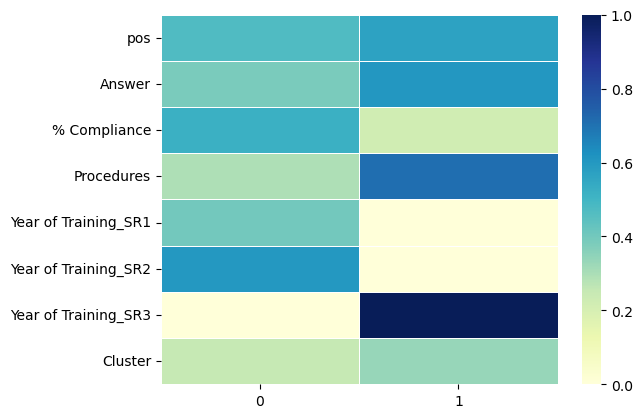

In [ ]:
# CLUSTERING 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
df2=scaler.fit_transform(cluster_personal_df)
from sklearn.cluster import KMeans
model_5 = KMeans(n_clusters = 2, random_state=0)
type(model_5)
model_5.fit(df2)
model_5.cluster_centers_
clust_means = pd.DataFrame(model_5.cluster_centers_, columns=cluster_personal_df.columns)
clust_means.T
import seaborn as sns
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")

In [ ]:
sse = pd.Series(range(14),index = range(1,15))

for i in range(1,15):
    model = KMeans(n_clusters = i, random_state=0)
    model.fit(cluster_personal_df)
    sse[i] = model.inertia_
print(sse)
plt.plot(sse.index, sse, linewidth=2.0)

c:\Users\WongQiHuiYve\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1     1.420758e+06
2     3.039082e+05
3     1.112465e+05
4     5.198373e+04
5     3.294156e+04
6     2.117648e+04
7     1.095187e+04
8     4.277525e+03
9     2.870761e+03
10    1.694676e+03
11    1.009072e+03
12    6.170114e+02
13    2.788739e+02
14    3.684224e+01
dtype: float64


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(cluster_personal_df)

print("Cluster labels:\n", agg_clustering.labels_)

Cluster labels:
 [1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0]


Cluster labels:  [1 0 0 1 0 1 1 0 0 2 2 0 1 0 0 0]
              pos    Answer  % Compliance  Procedures  Year of Training_SR1  \
Cluster                                                                       
0        0.721305  7.524691      0.874135  593.777778              0.111111   
1        0.682595  6.584156      0.853968  102.600000              0.600000   
2        0.706168  7.362637      0.808303  969.500000              0.000000   

         Year of Training_SR2  Year of Training_SR3  
Cluster                                              
0                    0.444444              0.444444  
1                    0.400000              0.000000  
2                    0.000000              1.000000  


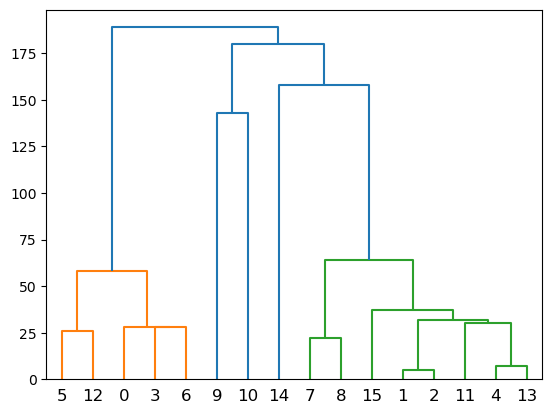

In [ ]:

# Calculate pairwise distances between the data points
distances = pdist(cluster_personal_df)

# Perform hierarchical clustering
linkage_matrix = linkage(distances)

# Visualize the dendrogram
dendrogram(linkage_matrix)

# Create clusters based on the dendrogram
num_clusters = 3
cluster_labels = AgglomerativeClustering(n_clusters=num_clusters).fit_predict(cluster_personal_df)

# Add the cluster labels to the dataframe
cluster_personal_df['Cluster'] = cluster_labels

# Calculate the mean values for each variable within each cluster
cluster_means = cluster_personal_df.groupby('Cluster').mean()

# Print the mean values for each cluster
print(cluster_means)

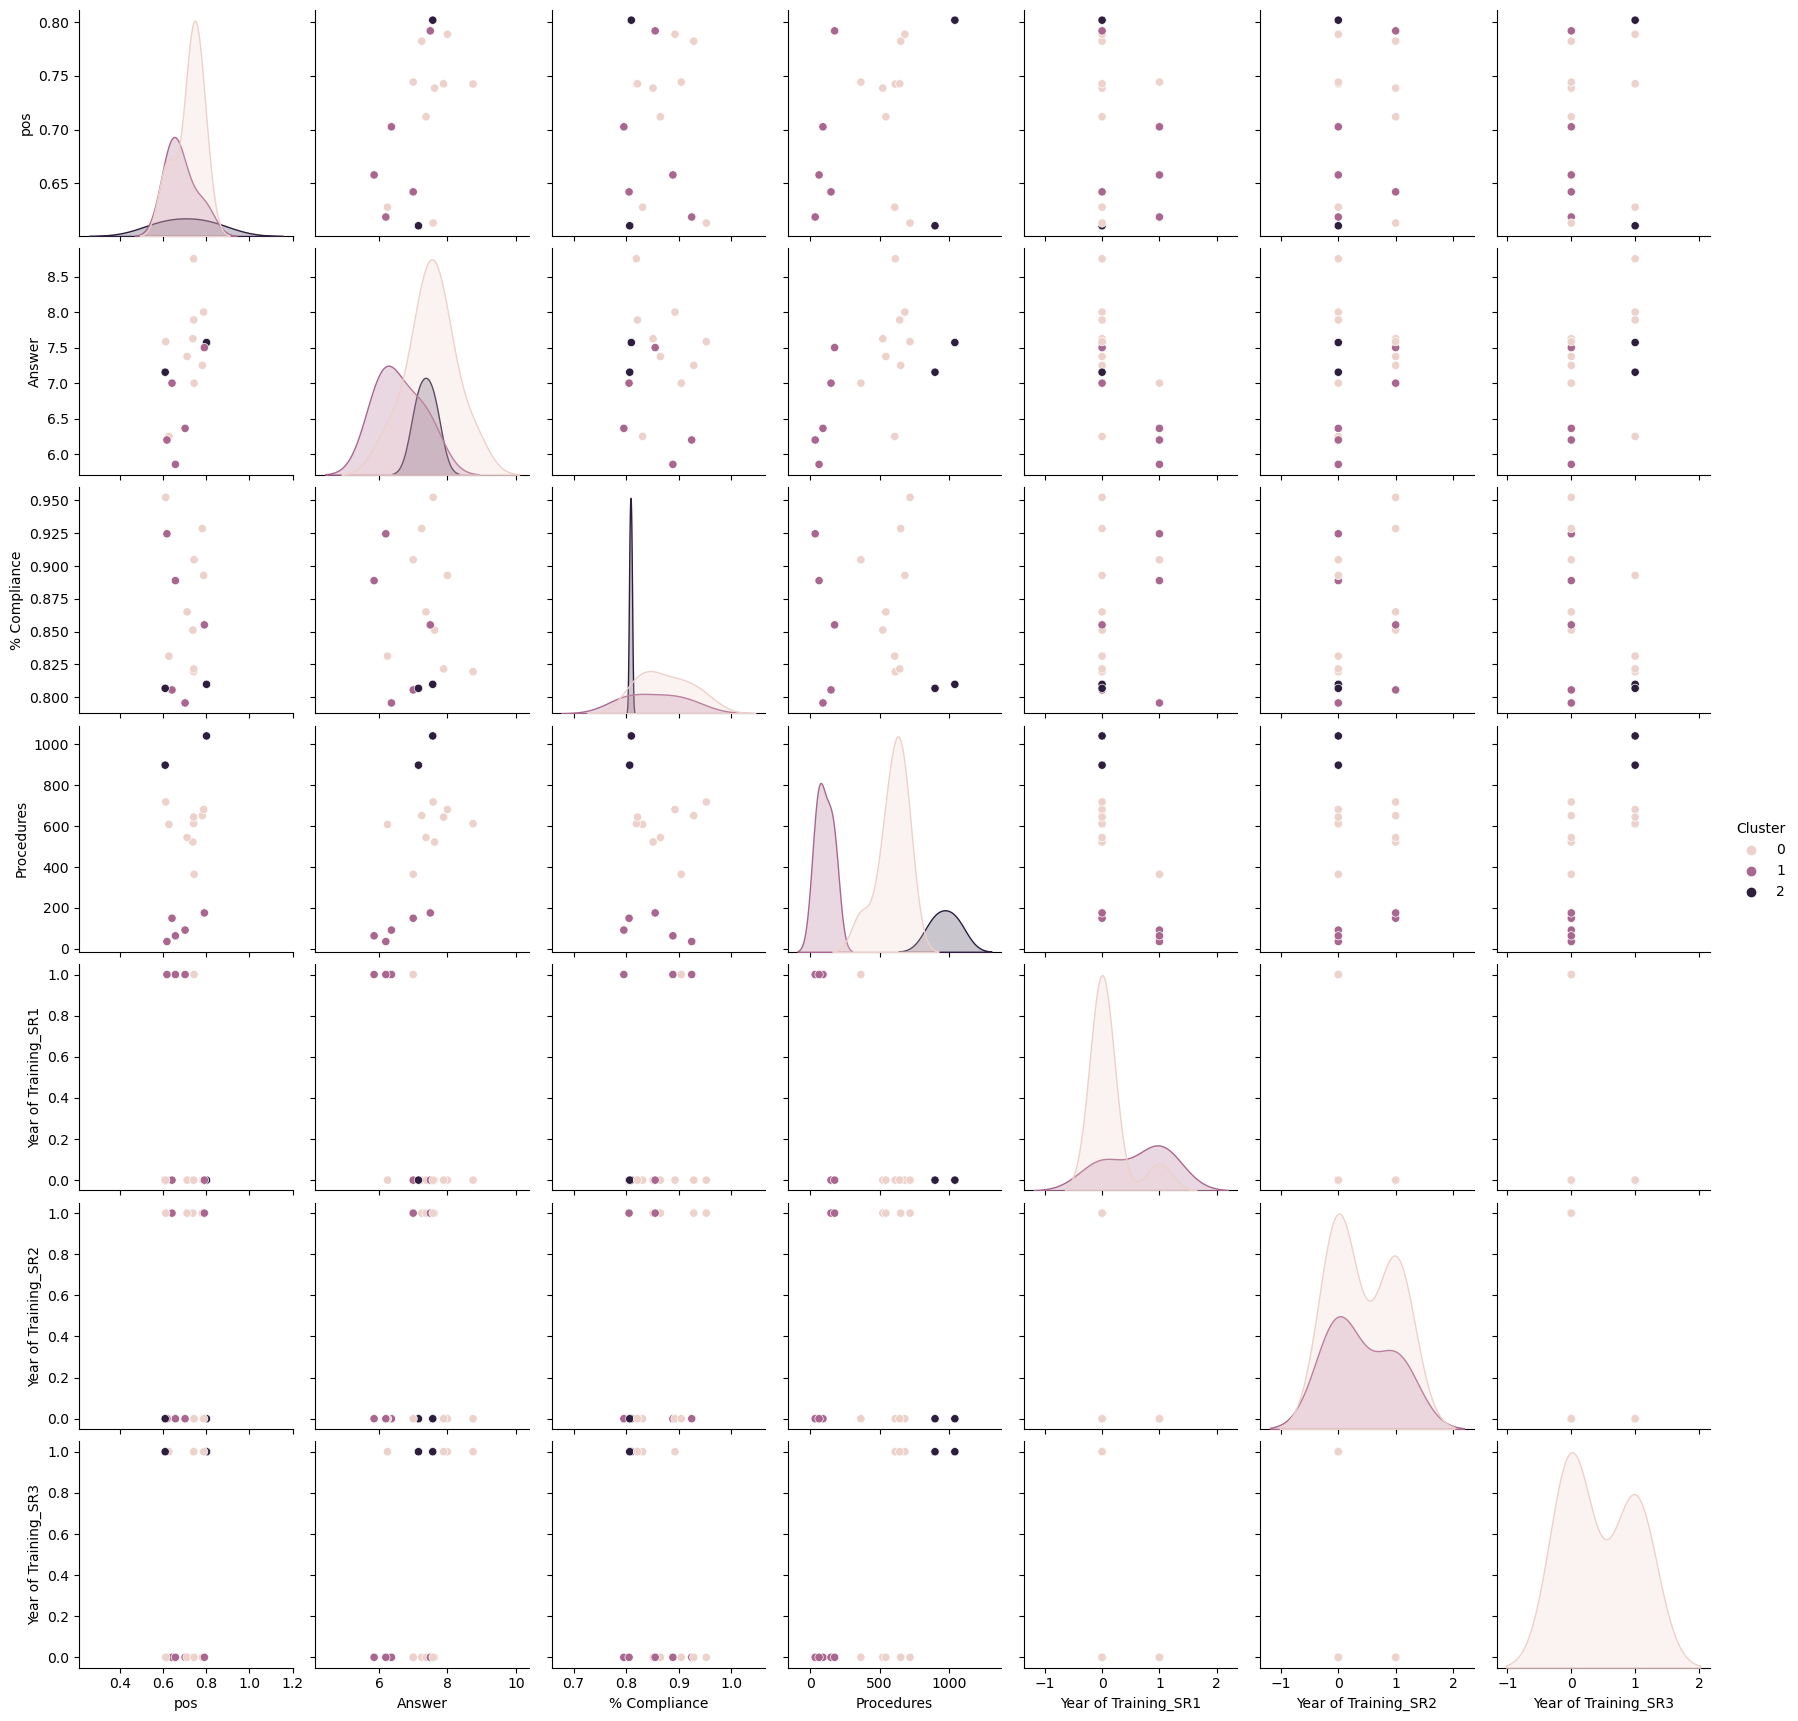

In [ ]:
sns.pairplot(cluster_personal_df, hue='Cluster')

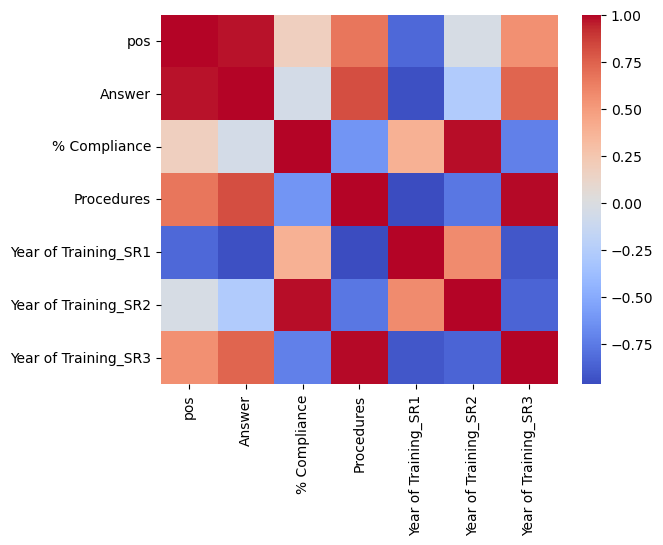

In [ ]:
sns.heatmap(cluster_means.corr(), cmap='coolwarm')
plt.show()

In [ ]:
specific_procedures=pd.read_excel('procedures.xlsx')
specific_procedures=specific_procedures.T
specific_procedures=specific_procedures.fillna(0)
specific_procedures.columns=specific_procedures.iloc[0]
specific_procedures=specific_procedures[1:]
# specific_procedures=specific_procedures.reset_index()
specific_procedures.columns

Index(['Abdominal paracentesis', 'Capsule endoscopy', 'Colonoscopy',
       'Colonoscopy with biopsy',
       'Colonoscopy with non-variceal hemostasis; actively bleeding',
       'Colonoscopy with non-variceal hemostasis; not actively bleeding',
       'Colonoscopy with polypectomy',
       'Endoscopic mucosal resection (EMR) / Endoscopic submucosal dissection (ESD)',
       'Endoscopic Retrograde and Cholangiocpancreatography (ERCP)',
       'Endoscopic ultrasound', 'Esophageal dilatation',
       'Esophageal motility / pH studies', 'Gastroscopy (OGD)',
       'Gastroscopy (OGD) with biopsy',
       'Gastroscopy (OGD) with non-variceal hemostasis; actively bleeding',
       'Gastroscopy (OGD) with non-variceal hemostasis; not actively bleeding',
       'Gastroscopy with variceal hemostasis; active bleeding',
       'Gastroscopy with variceal hemostasis; not actively bleeding',
       'Gastroscopy with variceal ligation; elective eradication',
       'Liver biopsy', 'Luminal Stenting'

<AxesSubplot:ylabel='Unnamed: 0'>

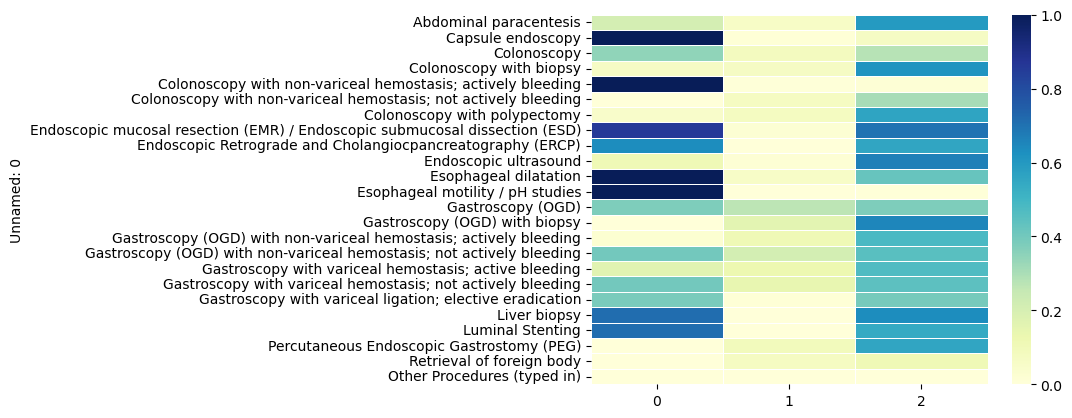

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
specific_procedures2=scaler.fit_transform(specific_procedures)
from sklearn.cluster import KMeans
model_4 = KMeans(n_clusters =3, random_state=0)
model_4.fit(specific_procedures2)
model_4.cluster_centers_
clust_means = pd.DataFrame(model_4.cluster_centers_, columns=specific_procedures.columns)
clust_means.T
import seaborn as sns
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")

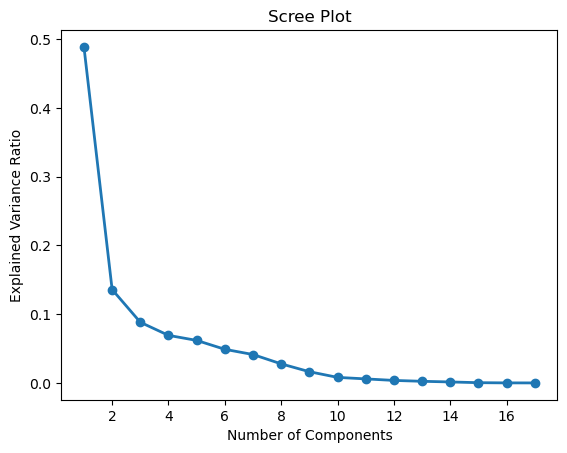

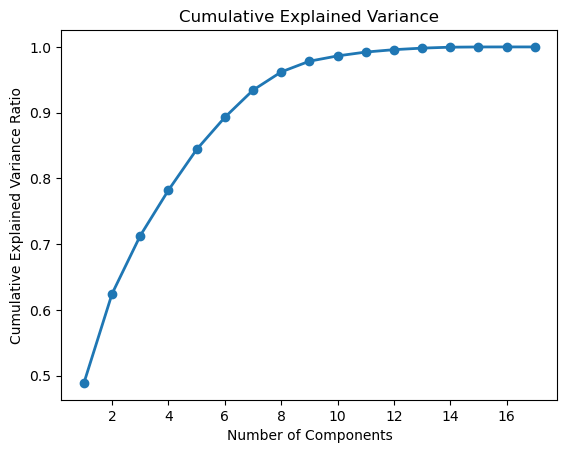

In [ ]:
from sklearn.decomposition import PCA
# Perform PCA and extract explained variance
pca = PCA()
pca.fit(specific_procedures2)
explained_var = pca.explained_variance_ratio_


# Generate scree plot
plt.plot(range(1, len(explained_var)+1), explained_var, 'o-', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Calculate cumulative explained variance
# cumulative_var = np.cumsum(explained_var)
# plt.plot(range(1, len(cumulative_var)+1), cumulative_var, 'o-', linewidth=2)
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance Ratio')
# plt.title('Cumulative Explained Variance')
# plt.show()

In [ ]:
# Create a PCA object with the desired number of components
pca = PCA(n_components=2)

# Apply PCA to your standardized data
X_pca = pca.fit_transform(specific_procedures2)

# Create a new DataFrame with the transformed data
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,0.656845,-0.201004
1,-1.126759,-0.032254
2,-1.354724,-0.022630
3,1.435635,-0.519888
4,-1.179896,-0.104600
5,0.391337,-0.129758
6,0.127653,1.997772
7,0.283741,-0.087284
8,1.542549,-0.030063
9,-1.389573,-0.034672


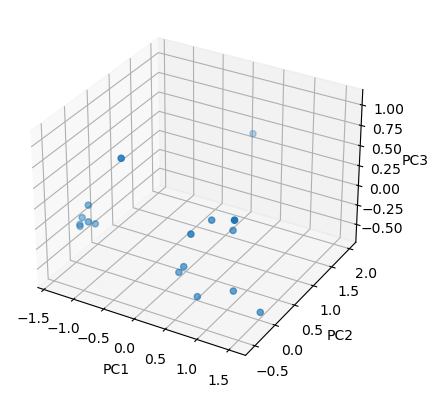

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# create a 3D scatter plot of the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [ ]:
# fit the PCA model to the data
pca.fit(specific_procedures)

# examine the loadings of the variables on each principal component
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=specific_procedures.columns)

# print the top variables for each principal component
print('Top variables for PC1:')
print(loadings['PC1'].abs().sort_values(ascending=False)[:3])
print('\nTop variables for PC2:')
print(loadings['PC2'].abs().sort_values(ascending=False)[:3])
# print('\nTop variables for PC3:')
# print(loadings['PC3'].abs().sort_values(ascending=False)[:3])

Top variables for PC1:
Unnamed: 0
Gastroscopy (OGD) with biopsy       0.839460
Esophageal motility / pH studies    0.376004
Colonoscopy with biopsy             0.189806
Name: PC1, dtype: float64

Top variables for PC2:
Unnamed: 0
Esophageal motility / pH studies    0.809287
Colonoscopy                         0.293272
Gastroscopy (OGD) with biopsy       0.278488
Name: PC2, dtype: float64


c:\Users\WongQiHuiYve\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1     612432.705882
2     324814.557143
3     135900.200000
4      80031.166667
5      47947.500000
6      36374.500000
7      28893.500000
8      23100.500000
9      18142.666667
10     13397.166667
11      8439.666667
12      4843.166667
13      3417.500000
14      2001.000000
dtype: float64


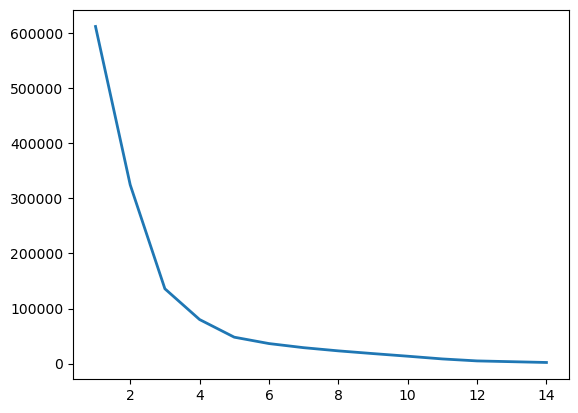

In [ ]:
sse = pd.Series(range(14),index = range(1,15))

for i in range(1,15):
    model = KMeans(n_clusters = i, random_state=0)
    model.fit(specific_procedures)
    sse[i] = model.inertia_
print(sse)
plt.plot(sse.index, sse, linewidth=2.0)

In [ ]:
specific_procedures=specific_procedures.reset_index()

total_df=pd.merge(cluster_personal_df, specific_procedures, left_on='Staff Name', right_on='index')

In [ ]:
total_df=total_df.set_index('index')
# total_df.drop('level_0',axis=1)

<AxesSubplot:>

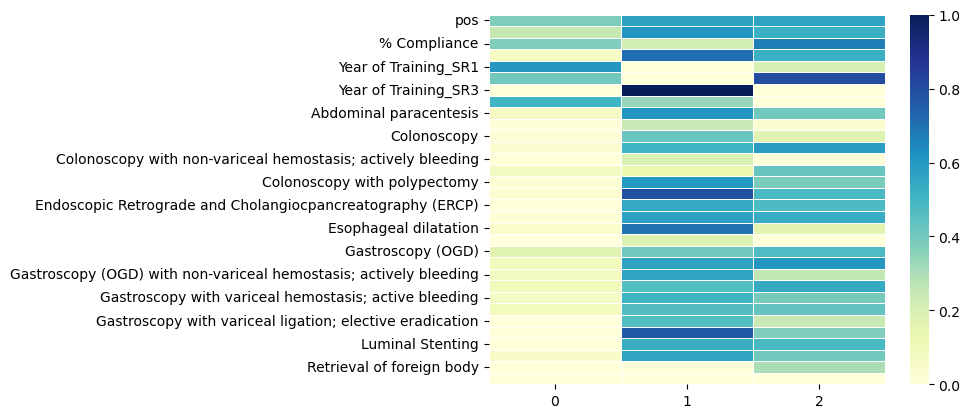

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
total2=scaler.fit_transform(total_df)
from sklearn.cluster import KMeans
model_total = KMeans(n_clusters = 3, random_state=0)
model_total.fit(total2)
model_total.cluster_centers_
clust_means = pd.DataFrame(model_total.cluster_centers_, columns=total_df.columns)
clust_means.T
import seaborn as sns
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")

In [ ]:
model_total.labels_

array([0, 1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 2, 2])

c:\Users\WongQiHuiYve\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1     612432.705882
2     324814.557143
3     135900.200000
4      80031.166667
5      47947.500000
6      36374.500000
7      28893.500000
8      23100.500000
9      18142.666667
10     13397.166667
11      8439.666667
12      4843.166667
13      3417.500000
14      2001.000000
dtype: float64


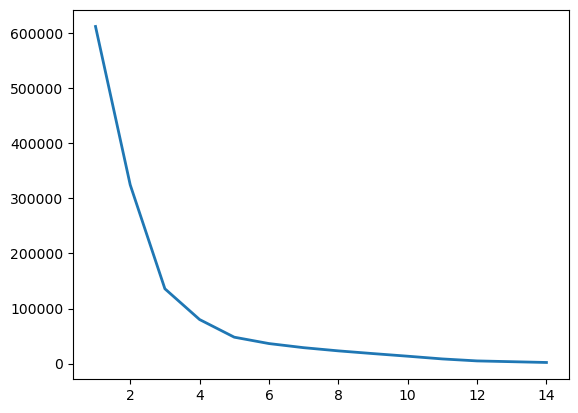

In [ ]:
sse = pd.Series(range(14),index = range(1,15))

for i in range(1,15):
    model = KMeans(n_clusters = i, random_state=0)
    model.fit(specific_procedures)
    sse[i] = model.inertia_
print(sse)
plt.plot(sse.index, sse, linewidth=2.0)

c:\Users\WongQiHuiYve\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\WongQiHuiYve\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



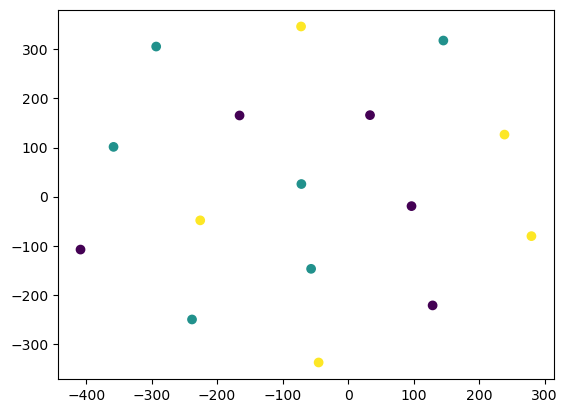

In [ ]:
from sklearn.manifold import TSNE
total_df['cluster_label'] = model_total.labels_
# Extract the features and labels
X = total_df.drop("cluster_label", axis=1).values
y = total_df["cluster_label"].values

# Apply t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.show()

In [ ]:
import plotly.express as px
# Create parallel coordinates plot
fig = px.parallel_coordinates(total_df, color="cluster_label")
fig.show()